## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

# boston price

In [2]:
from  sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston.data,columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state= 12, shuffle=True)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(354, 13) (152, 13)
(354,) (152,)


In [10]:
from sklearn.linear_model import LinearRegression #選擇模型
model = LinearRegression()#建立模型
model.fit(X_train,y_train)#訓練模型
y_pred = model.predict(X_test)#模型預測

In [11]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# 可以看回歸模型的參數值
print('Coefficients: ', model.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

print('R2 score:%.2f'%metrics.r2_score(y_test, y_test_pred))

Coefficients:  [-1.03179984e-01  5.37614774e-02  6.55398270e-02  3.34096405e+00
 -1.72285337e+01  3.57736775e+00  1.99386153e-02 -1.35026690e+00
  3.22983746e-01 -1.37975855e-02 -7.83634422e-01  1.04262975e-02
 -6.08841723e-01]
Mean squared error: 25.55
R2 score:0.71


# WINE

In [26]:
from sklearn.datasets import load_wine
import seaborn as sns
import numpy as np

wine = load_wine()

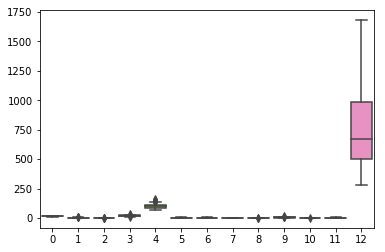

In [27]:
sns.boxplot(data=wine.data)

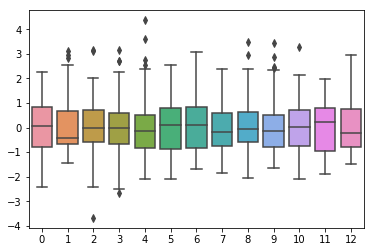

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fixed_wine = scaler.fit_transform(wine.data)
sns.boxplot(data=fixed_wine)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fixed_wine, wine.target, test_size=0.2)

In [30]:
from sklearn import ensemble 
model = ensemble.RandomForestClassifier()

In [31]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Patrick.Liou\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
from sklearn import metrics
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))
print("confusion matirx:\n", metrics.confusion_matrix(y_test, pred))

accuracy:0.28
confusion matirx:
 [[2 3 4]
 [6 6 2]
 [3 8 2]]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))
print("confusion matirx:\n", metrics.confusion_matrix(y_test, pred))

accuracy:1.00
confusion matirx:
 [[10  0  0]
 [ 0 16  0]
 [ 0  0 10]]


In [40]:
precision = metrics.precision_score(y_test, y_pred) 
recall  = metrics.recall_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred) # 使用 F1-Score 評估
print("F2-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.